In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
import pandas as pd
df_products = pd.read_csv('/content/drive/My Drive/BA820-Project/productinfo.csv')
df_reviews_1 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews0-250.csv")
df_reviews_2 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews250-500.csv")
df_reviews_3 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews500-750.csv")
df_reviews_4 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews750-1250.csv")
df_reviews_5 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews1250-end.csv")

<ipython-input-4-10c390fb889f>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews0-250.csv")
<ipython-input-4-10c390fb889f>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_4 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews750-1250.csv")
<ipython-input-4-10c390fb889f>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_5 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews1250-end.csv")


In [5]:
df_products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


# 1. Data Exploration

In [6]:
df_products['highlights'].unique()

array(["['Unisex/ Genderless Scent', 'Warm &Spicy Scent', 'Woody & Earthy Scent', 'Fresh Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']",
       ...,
       "['Best for Oily, Combo, Normal Skin', 'Without Parabens', 'Without Mineral Oil', 'Matte Finish', 'Salicylic Acid']",
       "['Natural Finish', 'Without Mineral Oil', 'Without Parabens']",
       "['Hyaluronic Acid', 'High Shine Finish', 'Plumping', 'Hydrating', 'Medium Coverage']"],
      dtype=object)

In [7]:
df_products['variation_type'].unique()

array([nan, 'Size + Concentration + Formulation', 'Scent', 'Size',
       'Color', 'Size + Concentration', 'Type', 'Formulation'],
      dtype=object)

In [8]:
df_products['variation_value'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL Eau de Parfum Spray', ...,
       '0.25 oz/ 7.5 ml', '2.6 oz', '2 oz / 60 mL eau de parfum spray'],
      dtype=object)

In [9]:
df_products['size'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL', ..., '0.25 oz/ 7.5 ml',
       '2.6 oz', '.11 oz / 3.2 mL'], dtype=object)

In [10]:
df_reviews = pd.concat([df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982

## 1.1 null values exploration

**PRODUCT TABLE**:
1. drop `sale_price_usd`, `value_price_usd`, `variation_desc`,`child_max_price`, `child_min_price`, `size`, `variation_type`, `variation_value`
2. impute values into `highlights` and `ingredients` with "NA"
3. keep `tertiary_category` for dimensionality reduction? impute with unknown for this + the `secondary_category` nulls too
4. for reviews nulls, check if any reviews exist in the reviews table & count them. Impute with that value, else 0
5. for ratings nulls, impute with the mean or median depending on skewness OR do average of ratings in review table

In [11]:
import numpy as np
np.round((df_products.isna().sum())/len(df_products),2).sort_values(ascending=False)

sale_price_usd        0.97
value_price_usd       0.95
variation_desc        0.85
child_max_price       0.68
child_min_price       0.68
highlights            0.26
size                  0.19
variation_value       0.19
variation_type        0.17
tertiary_category     0.12
ingredients           0.11
rating                0.03
reviews               0.03
sephora_exclusive     0.00
brand_id              0.00
child_count           0.00
secondary_category    0.00
primary_category      0.00
new                   0.00
out_of_stock          0.00
online_only           0.00
limited_edition       0.00
brand_name            0.00
product_name          0.00
price_usd             0.00
loves_count           0.00
product_id            0.00
dtype: float64

In [12]:
null_rows = df_products[df_products['size'].isnull() & df_products['variation_value'].isnull()] #due to similarities between size and variation_value columns, we considered to fill in with overlaps

print(len(null_rows)) #however, teh result shows that most of the rows have missing values in both columns

1333


**REVIEW TABLE**:
1. Drop `helpfulness` due to a significant number of missing values
2.  Drop the `is_recommended` column By analyzing the ratings, we can infer whether a product is likely to be recommended without the explicit need for the is_recommended data point.
2. Replace null review_text and review_title with "NA"
3. Replace skin_tone, eye_color, skin_type, hair_color with "Unknown"

In [13]:
(df_reviews.isna().sum()/len(df_reviews)).sort_values(ascending= False)

helpfulness                 0.513145
review_title                0.283855
hair_color                  0.207206
eye_color                   0.191544
skin_tone                   0.155827
is_recommended              0.153496
skin_type                   0.101933
review_text                 0.001319
brand_name                  0.000000
product_name                0.000000
product_id                  0.000000
Unnamed: 0                  0.000000
author_id                   0.000000
submission_time             0.000000
total_pos_feedback_count    0.000000
total_neg_feedback_count    0.000000
total_feedback_count        0.000000
rating                      0.000000
price_usd                   0.000000
dtype: float64

### 1.1.1 dropping columns with large missing values

In [14]:
df_products = df_products.drop(columns=['value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price', 'variation_desc', 'variation_type', 'variation_value', 'size'])

In [15]:
df_reviews = df_reviews.drop(columns=['helpfulness', 'is_recommended', 'Unnamed: 0'])

In [16]:
df_products.shape, df_reviews.shape

((8494, 19), (1094411, 16))

### 1.1.2 null value imputation

**PRODUCT TABLE**

In [17]:
df_products.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
ingredients            945
price_usd                0
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
dtype: int64

Impute missing values in 'highlights' and 'ingredients' columns with 'Unknown'

In [18]:
df_products['highlights'] = df_products['highlights'].fillna('Unknown')
df_products['ingredients'] = df_products['ingredients'].fillna('Unknown')

Impute missing values in 'tertiary_category' and 'secondary_category' columns with 'Unknown'

In [19]:
df_products['tertiary_category'] = df_products['tertiary_category'].fillna('Unknown')
df_products['secondary_category'] = df_products['secondary_category'].fillna('Unknown')

**REVIEW TABLE**

Replace null values in 'review_text' and 'review_title' with Unknown'

In [20]:
df_reviews['review_text'] = df_reviews['review_text'].fillna('Unknown')
df_reviews['review_title'] = df_reviews['review_title'].fillna('Unknown')

Replace null values in 'skin_tone', 'eye_color', 'skin_type', and 'hair_color' with 'Unknown'

In [21]:
df_reviews['skin_tone'] = df_reviews['skin_tone'].fillna('Unknown')
df_reviews['eye_color'] = df_reviews['eye_color'].fillna('Unknown')
df_reviews['skin_type'] = df_reviews['skin_type'].fillna('Unknown')
df_reviews['hair_color'] = df_reviews['hair_color'].fillna('Unknown')

Count the number of rows with null 'reviews' in df_products

In [22]:
df_products[df_products['reviews'].isna()].shape[0]

278

Update the `reviews` column in df_products with the actual count of reviews if available, or impute it with 0 if no reviews are found. Iterated over rows in the df_products where the reviews column is null, identifying each product by its ID, and counting corresponding reviews in the df_reviews.

In [23]:
null_reviews = df_products[df_products['reviews'].isna()]
null_reviews.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
42,P471525,Arancia di Capri Candle,5847,Acqua di Parma,601,NaN,NaN,Unknown,82.0,0,0,1,0,0,Unknown,Fragrance,Candles & Home Scents,Candles,0
60,P473154,Mini Baomint Moisturizing Curl Defining Gel,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Glycerin, Prunus Amygdalus Dul...",14.0,0,0,0,0,1,"['allure 2020 Best of Beauty Award Winner', 'C...",Hair,Mini Size,Unknown,0
61,P473153,Mini Baomint Moisturizing Curl Defining Cream,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",14.0,0,0,1,0,1,"['Clean at Sephora', 'Good for: Volume', 'All ...",Hair,Mini Size,Unknown,0
62,P473152,Mini Baomint Leave-In Conditioning Styler,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",13.0,0,0,1,0,1,"['Clean at Sephora', 'All Hair Types', 'Curl-E...",Hair,Mini Size,Unknown,0
63,P473155,Mini Baomint Moisturizing Shampoo,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Aloe Barbadensis Leaf Juice, C...",12.0,0,0,1,0,1,"['Unisex/ Genderless Scent', 'Clean at Sephora...",Hair,Mini Size,Unknown,0


In [24]:
for idx, product_row in null_reviews.iterrows():
    product_id = product_row['product_id']
    # Count the number of reviews for those products in df_reviews
    review_count = df_reviews[df_reviews['product_id'] == product_id].shape[0]
    # Update df_products with the count or 0 if no reviews exist
    df_products.at[idx, 'reviews'] = review_count if review_count > 0 else 0

## 1.2 Exploratory Data Analysis

### 1.2.1 Rating


Measure the asymmetry of the distribution of ratings around the mean value

In [25]:
skewness = df_products['rating'].skew()
skewness

-1.51762879552522

 Visualize the skewness of the rating distribution using a histogram

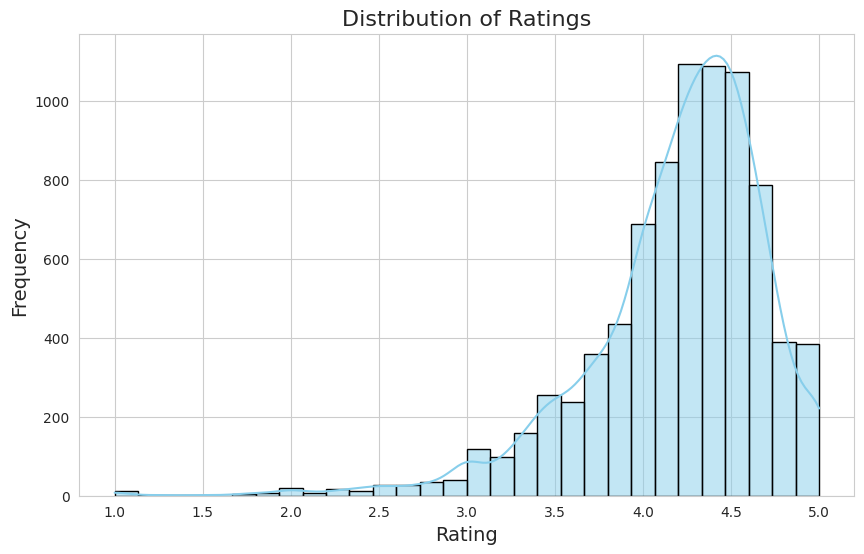

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_products['rating'], kde=True, bins=30, color='skyblue', edgecolor='black')

# title and label
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

Impute missing values in 'rating' with the median since the histogram indicates a left-skewed distribution, meaning that it is more appropriate to impute missing values with the median rather than the mean. The median is less affected by outliers and skewed data, making it a better choice for imputation in this case.

In [27]:
df_products['rating'] = df_products['rating'].fillna(df_products['rating'].median())

In [28]:
df_products['reviews'].isna().sum()

0

In [29]:
df_reviews['skin_tone'].value_counts()

light          266418
fair           208034
lightMedium    196541
Unknown        170539
medium          70486
mediumTan       62456
fairLight       56228
tan             33678
deep            20601
rich             5493
olive            1730
porcelain        1612
dark              522
notSureST          70
ebony               3
Name: skin_tone, dtype: int64

In [30]:
df_reviews['author_id'].value_counts()

1696370280     234
1288462295     171
5060164185     132
2330399812     131
7375781965     130
              ... 
35785194231      1
34116589282      1
38362244649      1
37964060718      1
5595682861       1
Name: author_id, Length: 578653, dtype: int64

In [31]:
# df_reviews[df_reviews['author_id'] == '1696370280'].sort_values(by='submission_time')

# **EDA (Sonya)**

In [33]:
from tabulate import tabulate

# Calculate basic statistics for numerical features in product_data
statistics = df_products[['loves_count', 'rating', 'reviews', 'price_usd']].describe()

# Convert the DataFrame to a list of lists for tabulation
statistics_table = statistics.reset_index().values.tolist()

# Tabulate the statistics with a prettier format
table_headers = ["Statistic", "Loves Count", "Rating", "Reviews", "Price (USD)"]
print(tabulate(statistics_table, headers=table_headers, tablefmt="pretty", numalign="right"))

+-----------+-------------------+--------------------+--------------------+--------------------+
| Statistic |    Loves Count    |       Rating       |      Reviews       |    Price (USD)     |
+-----------+-------------------+--------------------+--------------------+--------------------+
|   count   |      8494.0       |       8494.0       |       8494.0       |       8494.0       |
|   mean    | 29179.56592889098 | 4.197616811867202  | 433.8650812338121  | 51.65559453732046  |
|    std    | 66092.1225898942  | 0.5084476938088001 | 1086.7317719275052 | 53.669234407455846 |
|    min    |        0.0        |        1.0         |        0.0         |        3.0         |
|    25%    |      3758.0       |        4.0         |        22.0        |        25.0        |
|    50%    |      9880.0       | 4.289350000000001  |       112.0        |        35.0        |
|    75%    |     26841.25      |       4.5225       |       402.0        |        58.0        |
|    max    |     1401068.0   

In [32]:
# Calculate basic statistics for numerical features in reviews_data
df_reviews[['rating']].describe()

,rating
count,1.094411e+06
mean,4.299158e+00
std,1.149444e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


The statistics for the numerical features in the product dataset reveal interesting insights. On average, products have approximately 29,180 loves, a rating of around 4.20, 434 reviews, and are priced at 51.66. However, there is significant variability in these metrics, with loves_count ranging from 0 to over 1.4 million, ratings ranging from 1 to 5, reviews ranging from 0 to over 21,000, and prices ranging from 3 to 1,900.

Similarly, the statistics for the rating feature in the reviews dataset indicate that, on average, products are highly rated at around 4.30. The majority of ratings fall within the range of 4 to 5, with the median rating being 5. This suggests that most products receive positive ratings from users, contributing to the overall high average rating observed.

In [34]:
# Check the distribution of categorical variables in product_data
df_products[['limited_edition', 'online_only', 'out_of_stock', 'sephora_exclusive']].apply(pd.Series.value_counts)

,limited_edition,online_only,out_of_stock,sephora_exclusive
0,7897,6633,7868,6121
1,597,1861,626,2373


Limited Edition: Out of 8,494 products, 597 are classified as limited edition, indicating that a relatively small proportion of products fall into this category.

Online Only: A significant portion of products, 1,861 out of 8,494, are available exclusively online, suggesting that Sephora offers a substantial selection of products that can only be purchased through their online platform.

Out of Stock: Among the products in the dataset, 626 are currently out of stock, indicating that a portion of the products may not be readily available for purchase at the time of data collection.

Sephora Exclusive: Approximately 2,373 products are identified as exclusive to Sephora, suggesting that a considerable number of products are unique to Sephora's offerings, potentially serving as a competitive advantage in attracting customers to the platform.

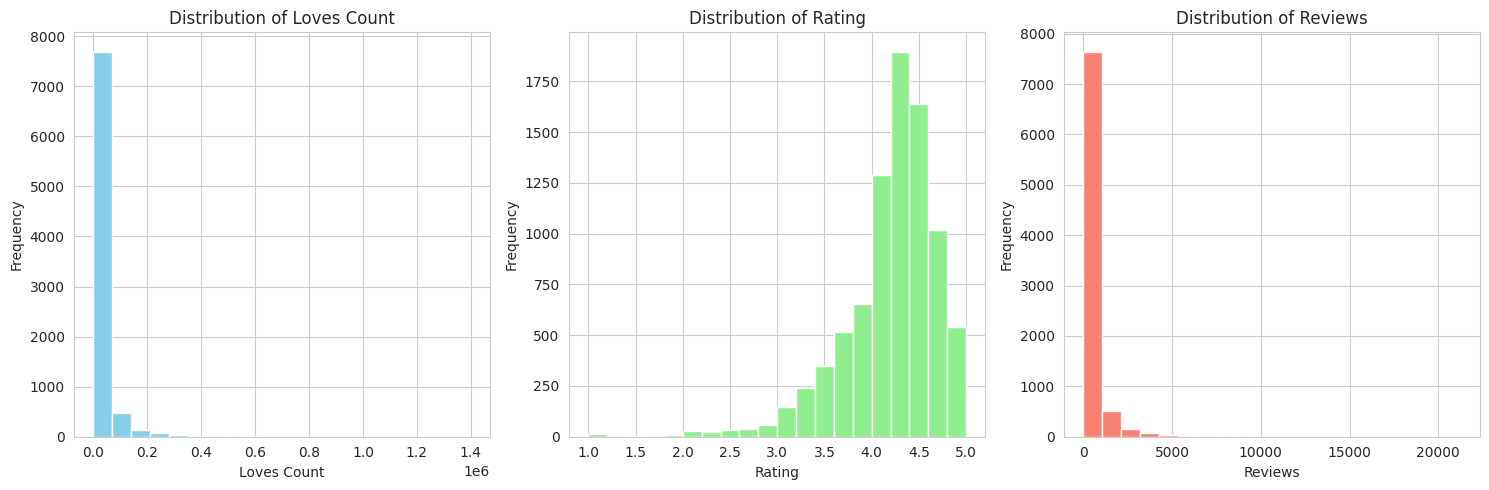

Top 10 Popular Products:
                                           product_name  loves_count
6242                            Soft Pinch Liquid Blush      1401068
5249                           Radiant Creamy Concealer      1153594
4431  Lip Sleeping Mask Intense Hydration with Vitam...      1081315
6434                    Cream Lip Stain Liquid Lipstick      1029051
2523                 Gloss Bomb Universal Lip Luminizer       968317
2524   Pro Filt’r Soft Matte Longwear Liquid Foundation       856497
5250                                              Blush       840076
247           Brow Wiz Ultra-Slim Precision Brow Pencil       834189
4458                   Translucent Loose Setting Powder       813497
7648        Niacinamide 10% + Zinc 1% Oil Control Serum       763168

Top 10 Highly Rated Products:
                                          product_name  rating
44                      Aperitivo In Terrazza Diffuser     5.0
128  Liquid Gold Midnight Reboot Serum with 14% Gly...     

In [36]:
# Distribution exploration
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of loves_count
axs[0].hist(df_products['loves_count'], bins=20, color='skyblue')
axs[0].set_title('Distribution of Loves Count')
axs[0].set_xlabel('Loves Count')
axs[0].set_ylabel('Frequency')

# Distribution of rating
axs[1].hist(df_products['rating'], bins=20, color='lightgreen')
axs[1].set_title('Distribution of Rating')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')

# Distribution of reviews
axs[2].hist(df_products['reviews'], bins=20, color='salmon')
axs[2].set_title('Distribution of Reviews')
axs[2].set_xlabel('Reviews')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Identify popular products based on loves_count
popular_products = df_products.nlargest(10, 'loves_count')[['product_name', 'loves_count']]
print("Top 10 Popular Products:")
print(popular_products)

# Identify highly rated products based on rating
highly_rated_products = df_products.nlargest(10, 'rating')[['product_name', 'rating']]
print("\nTop 10 Highly Rated Products:")
print(highly_rated_products)


The top 10 most loved products are predominantly makeup items, including blush, concealer, lipstick, and foundation. Among them, the Soft Pinch Liquid Blush stands out with the highest loves_count, indicating its popularity among customers. On the other hand, the top 10 highly rated products feature a diverse range of items, from skincare to fragrance, suggesting a broader appeal across different product categories. These products have all received a perfect rating of 5.0, indicating exceptional customer satisfaction and quality.


<ipython-input-34-657d9206004f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


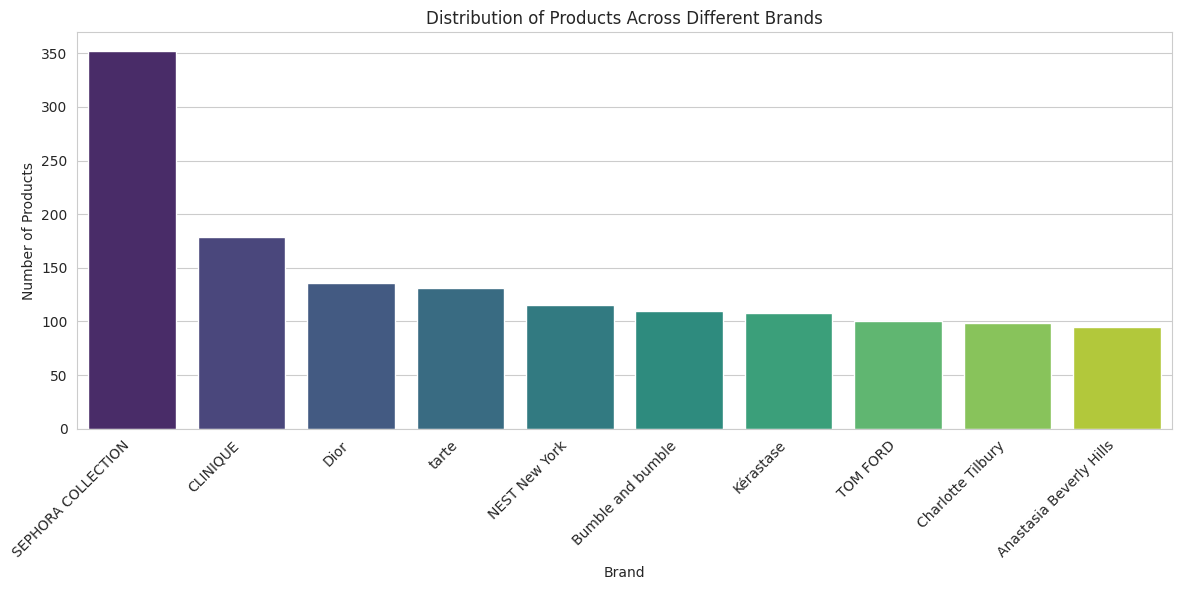

Top 10 Popular Brands Based on Number of Products:
SEPHORA COLLECTION         352
CLINIQUE                   179
Dior                       136
tarte                      131
NEST New York              115
Bumble and bumble          110
Kérastase                  108
TOM FORD                   100
Charlotte Tilbury           99
Anastasia Beverly Hills     95
Name: brand_name, dtype: int64

Top 10 Popular Brands Based on Overall Rating:
brand_name
Aquis                  4.904800
MACRENE actives        4.889420
MARA                   4.823860
CANOPY                 4.813733
DOMINIQUE COSMETICS    4.785700
BondiBoost             4.776950
Erno Laszlo            4.763117
DAMDAM                 4.752775
Kate McLeod            4.751583
maude                  4.740100
Name: rating, dtype: float64


In [34]:
# Distribution of products across different brands
plt.figure(figsize=(12, 6))
brand_counts = df_products['brand_name'].value_counts().nlargest(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Distribution of Products Across Different Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify popular brands based on the number of products
print("Top 10 Popular Brands Based on Number of Products:")
print(brand_counts)

# Identify popular brands based on overall rating
brand_rating = df_products.groupby('brand_name')['rating'].mean().nlargest(10)
print("\nTop 10 Popular Brands Based on Overall Rating:")
print(brand_rating)



The top 10 popular brands based on the number of products are predominantly well-known names in the beauty industry, with Sephora Collection leading by a significant margin. Conversely, the top 10 popular brands based on overall rating feature lesser-known or niche brands like Aquis, Macrene Actives, and Mara, indicating that smaller brands can still achieve high levels of customer satisfaction and loyalty. This suggests that consumers are increasingly valuing quality and efficacy over brand recognition alone.

<ipython-input-35-8834d4dc83ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_category_counts.index, y=primary_category_counts.values, palette='viridis')


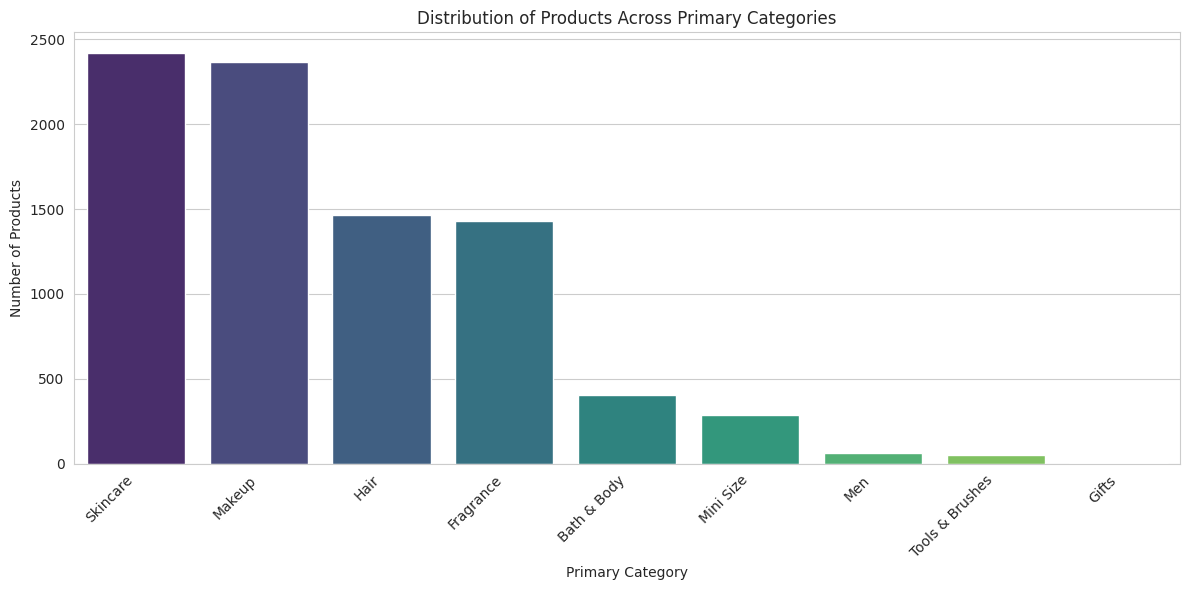

<ipython-input-35-8834d4dc83ad>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=secondary_category_counts.index, y=secondary_category_counts.values, palette='viridis')


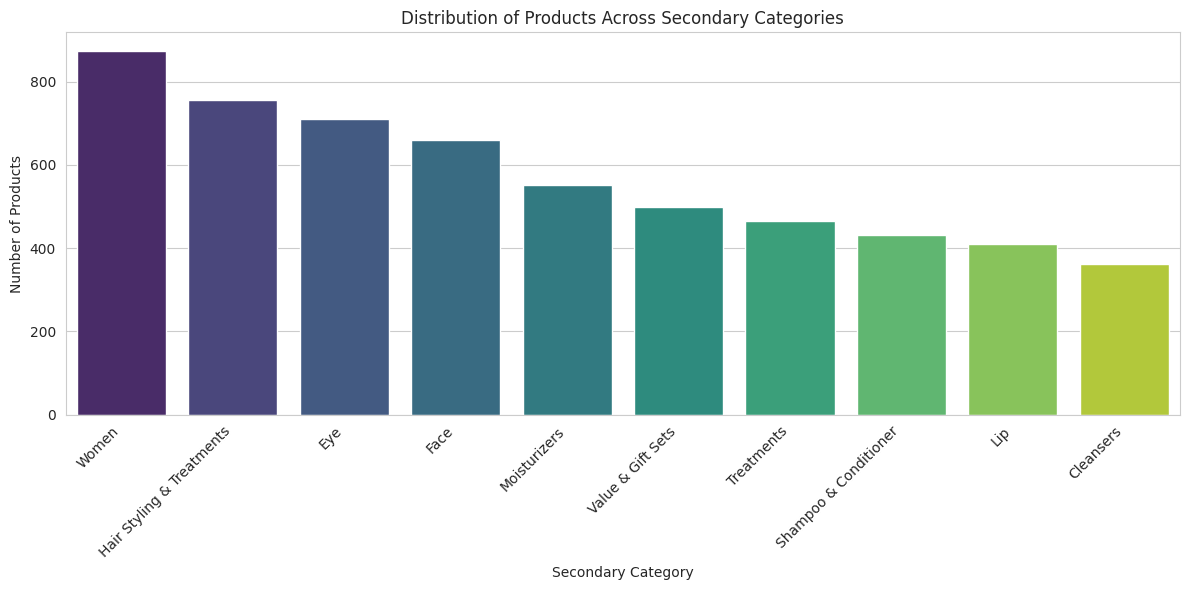

<ipython-input-35-8834d4dc83ad>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tertiary_category_counts.index, y=tertiary_category_counts.values, palette='viridis')


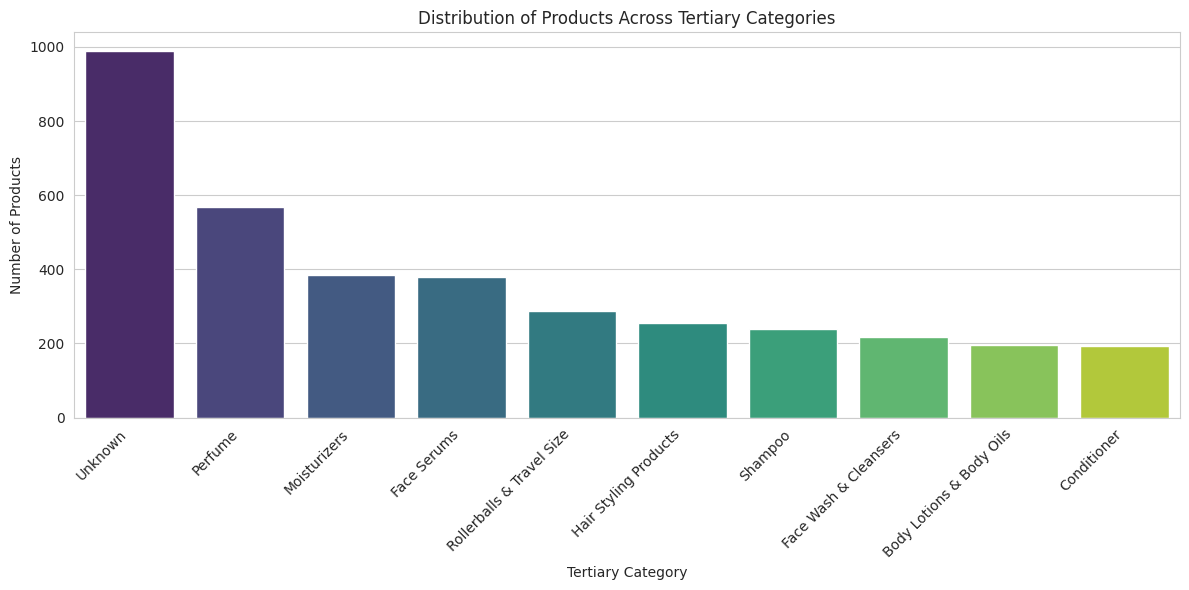

Top 10 Most Common Primary Categories:
Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

Top 10 Most Common Secondary Categories:
Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Name: secondary_category, dtype: int64

Top 10 Most Common Tertiary Categories:
Unknown                      990
Perfume                      568
Moisturizers                 386
Face Serums                  379
Rollerballs & Travel Size    287
Hair Styling Products        255
Shampoo                      238
Face Wash & Cleansers    

<ipython-input-35-8834d4dc83ad>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_primary_category.index, y=avg_rating_by_primary_category.values, palette='muted')


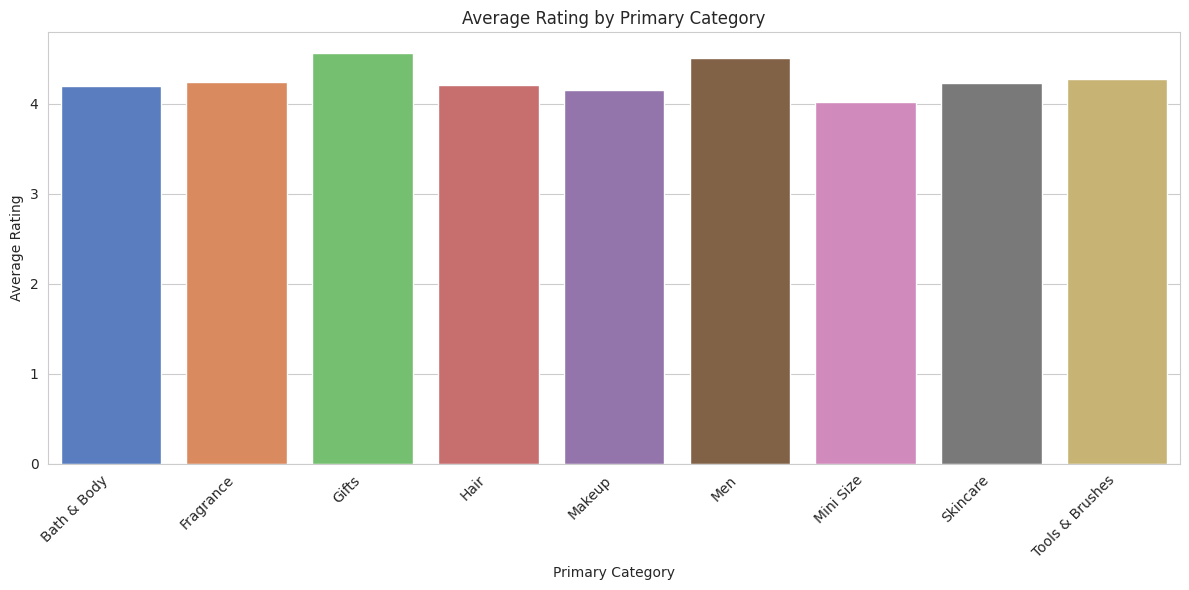

<ipython-input-35-8834d4dc83ad>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_primary_category.index, y=avg_price_by_primary_category.values, palette='muted')


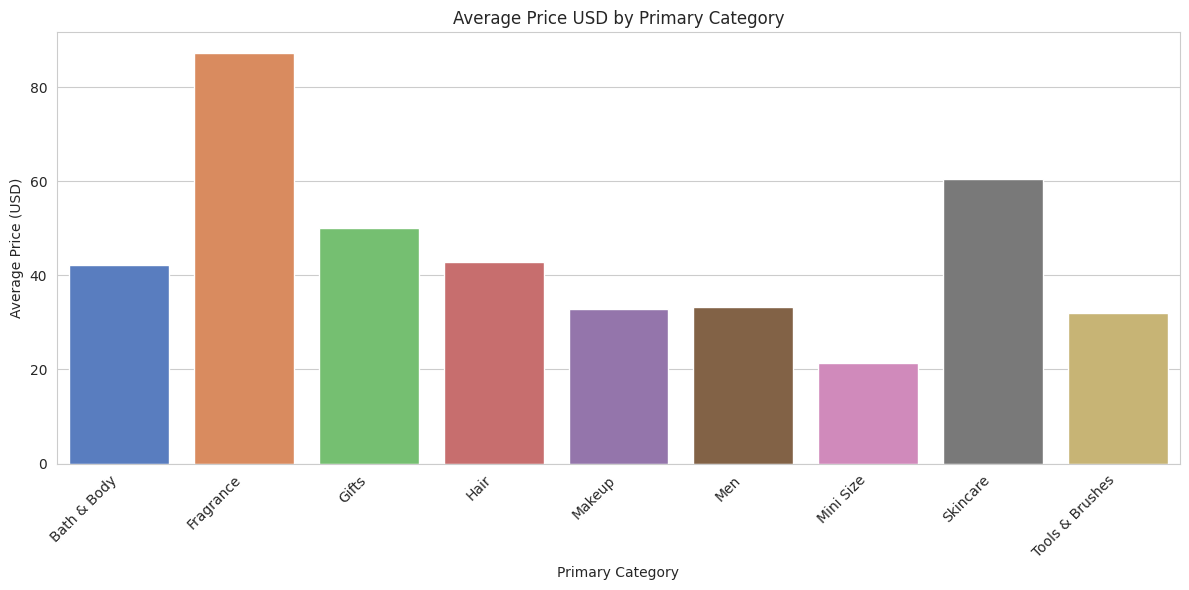

In [35]:
# Distribution of products across primary categories
plt.figure(figsize=(12, 6))
primary_category_counts = df_products['primary_category'].value_counts().nlargest(10)
sns.barplot(x=primary_category_counts.index, y=primary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Primary Categories')
plt.xlabel('Primary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of products across secondary categories
plt.figure(figsize=(12, 6))
secondary_category_counts = df_products['secondary_category'].value_counts().nlargest(10)
sns.barplot(x=secondary_category_counts.index, y=secondary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Secondary Categories')
plt.xlabel('Secondary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of products across tertiary categories
plt.figure(figsize=(12, 6))
tertiary_category_counts = df_products['tertiary_category'].value_counts().nlargest(10)
sns.barplot(x=tertiary_category_counts.index, y=tertiary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Tertiary Categories')
plt.xlabel('Tertiary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify the most common categories
print("Top 10 Most Common Primary Categories:")
print(primary_category_counts)
print("\nTop 10 Most Common Secondary Categories:")
print(secondary_category_counts)
print("\nTop 10 Most Common Tertiary Categories:")
print(tertiary_category_counts)

# Analyze average rating and price_usd by primary category
avg_rating_by_primary_category = df_products.groupby('primary_category')['rating'].mean()
avg_price_by_primary_category = df_products.groupby('primary_category')['price_usd'].mean()

# Plot average rating by primary category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_primary_category.index, y=avg_rating_by_primary_category.values, palette='muted')
plt.title('Average Rating by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot average price_usd by primary category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_primary_category.index, y=avg_price_by_primary_category.values, palette='muted')
plt.title('Average Price USD by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



The top 10 most common primary categories include Skincare and Makeup, indicating that these are the most prevalent product types available. In secondary categories, Women's products are the most common, followed by categories like Hair Styling & Treatments and Eye products. Tertiary categories reveal that Perfume and Moisturizers are highly represented, while Rollerballs & Travel Size and Hair Styling Products also have a significant presence. This distribution suggests a diverse range of offerings catering to various beauty needs and preferences.

On average, Gifts have the highest rating out of the primary categories. And Fragrance has a distinctly higher price than other primary categories on average.

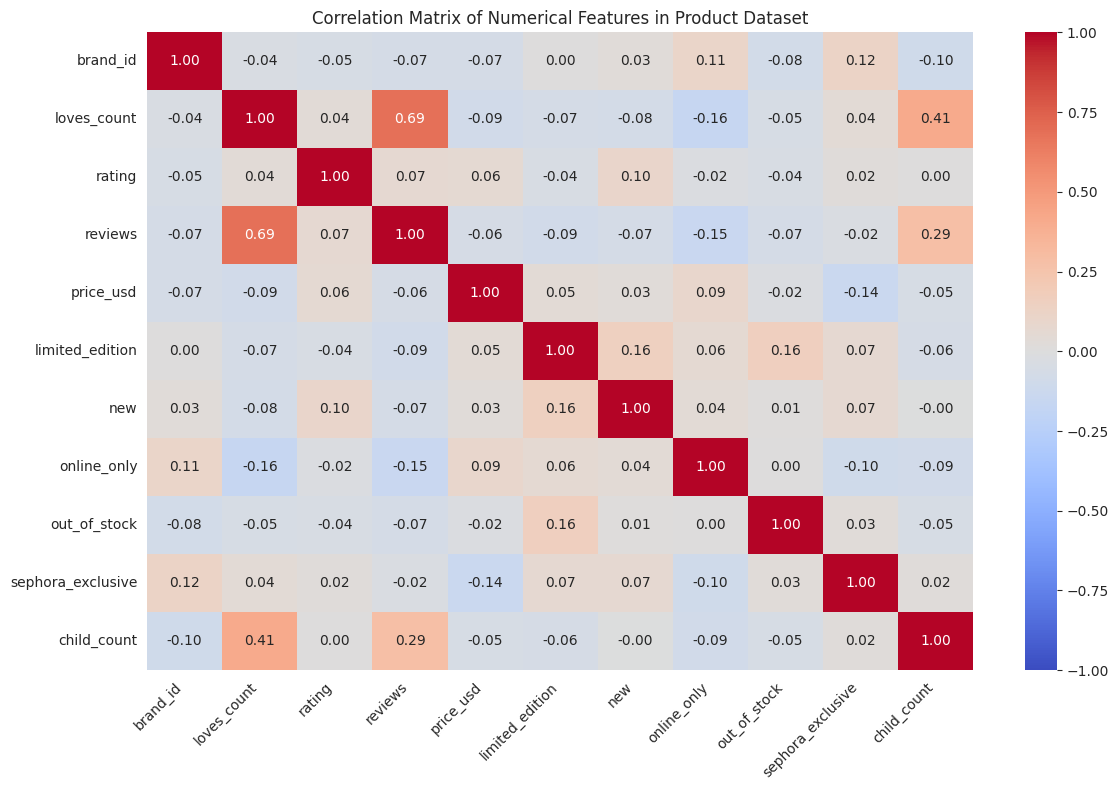

In [49]:
# Select numerical features from the product dataset
numerical_features = df_products.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features in Product Dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




The relatively high correlation between loves_count and reviews suggests that there is a strong relationship between the number of people marking a product as a favorite (loves_count) and the number of user reviews the product receives. This correlation implies that products with more favorites tend to also have more reviews, indicating that higher levels of user engagement, interest, and satisfaction may lead to increased review activity. In other words, when customers love a product, they are more likely to leave reviews about it, contributing to a higher number of overall reviews for that product.

# 3. Unsupervised Methods

## 3.1 Market Basket Analysis

In [ ]:
df_products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [ ]:
df_reviews.head()

,author_id,rating,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Unknown,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,Unknown,Unknown,Unknown,Unknown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,Unknown,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,Unknown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
joined_table = df_reviews.merge(df_products, on=['product_id', 'product_name', 'price_usd', 'brand_name'], how= 'inner', suffixes=('reviews', 'products'))

In [ ]:
joined_table

,author_id,ratingreviews,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,...,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,1741593524,5,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Unknown,brown,...,0,0,1,0,0,['Clean at Sephora'],Skincare,Cleansers,Unknown,0
1,31423088263,1,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,Unknown,Unknown,...,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,Unknown,3
2,5061282401,5,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,...,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,Unknown,3
3,6083038851,5,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,Unknown,brown,...,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,Unknown,3
4,47056667835,5,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,...,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,Unknown,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094406,2276253200,5,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,Unknown,fair,brown,...,0,1,0,0,0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,0
1094407,28013163278,5,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,Unknown,Unknown,blue,...,0,1,0,0,0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,0
1094408,1539813076,5,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,Unknown,light,blue,...,0,1,0,0,0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,0
1094409,5595682861,5,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,Unknown,fair,hazel,...,0,1,0,0,0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,0


In [ ]:
by_author = joined_table.groupby(['author_id', 'submission_time'])['product_name'].agg(lambda x: ', '.join(x))

In [ ]:
by_author = pd.DataFrame(by_author)
by_author

product_name
author_id       submission_time                                                   
538863          2018-11-01       Lip Sleeping Mask Intense Hydration with Vitam...
549704          2011-04-21                              100 percent Pure Argan Oil
557770          2016-02-19                                EradiKate Acne Treatment
561736          2018-07-28       Midnight Recovery Concentrate Moisturizing Fac...
562130          2014-11-29             Dramatically Different Moisturizing Lotion+
...                                                                            ...
orderGen5563740 2015-03-11                     Irish Moor Mud Purifying Black Mask
                2015-06-30                    Greek Yoghurt Foaming Cream Cleanser
                2018-04-11                          Potent-C Vitamin C Power Serum
orderGen703225  2011-08-01                                           Rosebud Salve
orderGen899861  2012-03-23             Wild Rose Night-Brightening Sleeping Facial

[877752 rows x 1 columns]

No charts were generated by quickchart


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
